Some General Comments on this Code

No, this code is not perfect. However, it does run correctly and return the data that you need in order to analyze the CLASS in this way. It requires a lot more touching up to make it into a completely generalized tool but my knowledge of of the phython programming language is too limited to make those changes. I would encourage anyone who might want to work with this tool to read through all the code and documentation and ensure that you know how it works.

Another note is that this will save a lot of the data is processes and the file locations that it is currently saving to are not going to be correct for how you are using it on your computer. Make sure to go through and edit all of the locations to save them in places that make sense to you, or comment out all the parts of the code that require saving and reading that saved data.

A final note is that you will see documentation for all of the code, however there are also some comments within that will tell you more specifically what the variables might mean in the cases where I may not have defined things as clearly as I should have.

Regardless of its flaws, this code is at least a complete example on what packages, functions and processes to use when looking to process raw data from a Qualitrix Administration of the CLASS survey with some specific extra questions on the post survey. I do hope that it can be of assistance to anyone looking to do this kind of research and if you have question or clarifications that you would need on the code, please do not hesitate to email me about them at eli.sollid@gmail.com

In [32]:
import math
import scipy.stats as stats
import numpy as np
import csv
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  # white   with alpha = 100%
})

Global Lists and Dictionaries

In [33]:
# Create a list of the majors
Majors = ['Biology', 'Chemistry', 'BioChemistry', 'Health Sciences', 'Natural Sciences', 'Other']
#dictionary of all the directions for analysis
Directions = {'Fav' : 'Favorable', 'UnFav' : 'Unfavorable', 'Neut' : 'Neutral'}
dirs = ['Fav', 'UnFav', 'Neut']
# Create all the important lists for indexing and renaming
Full_Collist = []
Full_Collist.append('University_Major')
Full_Collist.append('IDNumbers')
#numbers from Q1-Q42
for n in range(1,7):
    for i in range(1,8):
        Full_Collist.append('Q'+ str(i + (n-1)*7))
CLASS_List = Full_Collist.copy()
PreFull = Full_Collist.copy()
#create sublists to be used for other purposes
CLASS_List.remove('University_Major')
CLASS_List.remove('IDNumbers')
Full_Collist.append('Historical Context')
Full_Collist.append('Molecular Properties')
Full_Collist.append('Membrane Potential')
Full_Collist.append('Electrocardiography')
Full_Collist.append('Defibrillation')
#another sublist
Survey_data_names = Full_Collist.copy()
Survey_data_names.remove('University_Major')
Survey_data_names.remove('IDNumbers')

In [34]:
#Open and read the CSV Containing the Questions
CLASS_Questions = pd.read_csv("CLASS Questions.csv")
#turns the dataframe into a series so I can strip the parts of the strings that I dont want.
CLASS_Series = CLASS_Questions.iloc[0].squeeze()
CLASS_Series[CLASS_List] = CLASS_Series[CLASS_List].str.replace(r'Please answer with how much you agree or disagree with each statement. - ', '')

# Real World
Real_World_Nums = [CLASS_List[27],CLASS_List[29],CLASS_List[34],CLASS_List[36]]
Real_World_Qs = [CLASS_Questions.at[0,CLASS_List[27]],CLASS_Questions.at[0,CLASS_List[29]],CLASS_Questions.at[0,CLASS_List[34]],CLASS_Questions.at[0,CLASS_List[36]]]

# Personal Interest
Personal_Interest_Nums = [CLASS_List[2],CLASS_List[10],CLASS_List[13],CLASS_List[24],CLASS_List[27],CLASS_List[29]]
Personal_Interest_Qs = [CLASS_Questions.at[0,CLASS_List[2]],CLASS_Questions.at[0,CLASS_List[10]],CLASS_Questions.at[0,CLASS_List[13]],CLASS_Questions.at[0,CLASS_List[24]],CLASS_Questions.at[0,CLASS_List[27]],CLASS_Questions.at[0,CLASS_List[29]]]

# Sense Making
SM_Nums = [CLASS_List[10],CLASS_List[22],CLASS_List[23],CLASS_List[31],CLASS_List[35],CLASS_List[38],CLASS_List[41]]
SM_Qs = [CLASS_Questions.at[0,CLASS_List[10]],CLASS_Questions.at[0,CLASS_List[22]],CLASS_Questions.at[0,CLASS_List[23]],CLASS_Questions.at[0,CLASS_List[31]],CLASS_Questions.at[0,CLASS_List[35]],CLASS_Questions.at[0,CLASS_List[38]],CLASS_Questions.at[0,CLASS_List[41]]]

# Conceptual Connections
CC_Nums = [CLASS_List[0],CLASS_List[4],CLASS_List[5],CLASS_List[12],CLASS_List[20],CLASS_List[31]]
CC_Qs = [CLASS_Questions.at[0,CLASS_List[0]],CLASS_Questions.at[0,CLASS_List[4]],CLASS_Questions.at[0,CLASS_List[5]],CLASS_Questions.at[0,CLASS_List[12]],CLASS_Questions.at[0,CLASS_List[20]],CLASS_Questions.at[0,CLASS_List[31]]]

# Applied Conceptual Understanding
ACU_Nums = [CLASS_List[0],CLASS_List[4],CLASS_List[5],CLASS_List[7],CLASS_List[20],CLASS_List[21],CLASS_List[39]]
ACU_Qs = [CLASS_Questions.at[0,CLASS_List[0]],CLASS_Questions.at[0,CLASS_List[4]],CLASS_Questions.at[0,CLASS_List[5]],CLASS_Questions.at[0,CLASS_List[7]],CLASS_Questions.at[0,CLASS_List[20]],CLASS_Questions.at[0,CLASS_List[21]],CLASS_Questions.at[0,CLASS_List[39]]]

# Problem Solving General
PSG_Nums = [CLASS_List[12],CLASS_List[14],CLASS_List[15],CLASS_List[24],CLASS_List[25],CLASS_List[33],CLASS_List[39],CLASS_List[41]]
PSG_Qs = [CLASS_Questions.at[0,CLASS_List[12]],CLASS_Questions.at[0,CLASS_List[14]],CLASS_Questions.at[0,CLASS_List[15]],CLASS_Questions.at[0,CLASS_List[24]],CLASS_Questions.at[0,CLASS_List[25]],CLASS_Questions.at[0,CLASS_List[33]],CLASS_Questions.at[0,CLASS_List[39]],CLASS_Questions.at[0,CLASS_List[41]]]

# Problem Solving Confidence
PSConf_Nums = [CLASS_List[14],CLASS_List[15],CLASS_List[33],CLASS_List[39]]
PSConf_Qs = [CLASS_Questions.at[0,CLASS_List[14]],CLASS_Questions.at[0,CLASS_List[15]],CLASS_Questions.at[0,CLASS_List[33]],CLASS_Questions.at[0,CLASS_List[39]]]

# Problem Solving Sophistication
PSSoph_Nums = [CLASS_List[4],CLASS_List[20],CLASS_List[21],CLASS_List[24],CLASS_List[33],CLASS_List[39]]
PDSoph_Qs = [CLASS_Questions.at[0,CLASS_List[4]],CLASS_Questions.at[0,CLASS_List[20]],CLASS_Questions.at[0,CLASS_List[21]],CLASS_Questions.at[0,CLASS_List[24]],CLASS_Questions.at[0,CLASS_List[33]],CLASS_Questions.at[0,CLASS_List[39]]]

# Not Scored
NS_Nums = [CLASS_List[3],CLASS_List[6],CLASS_List[8],CLASS_List[30],CLASS_List[32],CLASS_List[40]]
NS_Qs = [CLASS_Questions.at[0,CLASS_List[3]],CLASS_Questions.at[0,CLASS_List[6]],CLASS_Questions.at[0,CLASS_List[8]],CLASS_Questions.at[0,CLASS_List[30]],CLASS_Questions.at[0,CLASS_List[32]],CLASS_Questions.at[0,CLASS_List[40]]]

# Interdisciplinary
IA_Nums = [Survey_data_names[42],Survey_data_names[43],Survey_data_names[44],Survey_data_names[45],Survey_data_names[46]]

#flip
flip_Nums = [CLASS_List[0],CLASS_List[4],CLASS_List[5],CLASS_List[7],CLASS_List[9],CLASS_List[11],CLASS_List[12],CLASS_List[16],CLASS_List[17],CLASS_List[19],CLASS_List[20],CLASS_List[21],CLASS_List[22],CLASS_List[26],CLASS_List[28],CLASS_List[31],CLASS_List[34],CLASS_List[39]]

# Dictionary to be able to call these datasets easily
keys = ['RW', 'PI', 'SM', 'CC', 'ACU', 'PSG', 'PSConf', 'PSSoph', 'NS', 'CLASS']
Category_Names = {'RW' : 'Real World Connection', 'PI' : "Personal Interest", 'SM': 'Sense Making and Effort', 'CC' : 'Conceptual Connections', 'ACU' : 'Applied Conceptual Understanding', 'PSG' : 'Problem Solving General', 'PSConf' : 'Problem Solving Confidence', 'PSSoph' : 'Problem Solving Sophistication', 'NS' : 'Not Scored', 'CLASS' : 'Overall'}
Category_Nums = {'RW' : Real_World_Nums, 'PI' : Personal_Interest_Nums, 'SM' : SM_Nums, 'CC' : CC_Nums, 'ACU' : ACU_Nums, 'PSG' : PSG_Nums, 'PSConf' : PSConf_Nums, 'PSSoph' : PSSoph_Nums, 'NS' : NS_Nums, 'IA' : IA_Nums, 'Flip' : flip_Nums, 'CLASS' : CLASS_List, 'All' : Full_Collist}
Category_Qs = {'RW' : Real_World_Qs, 'PI' : Personal_Interest_Qs, 'SM' : SM_Qs, 'CC' : CC_Qs, 'ACU' : ACU_Qs, 'PSG' : PSG_Qs, 'PSConf' : PSConf_Qs, 'PSSoph' : PSG_Qs, 'NS' : NS_Qs}

C:\Users\ELISOL~1\AppData\Local\Temp/ipykernel_5152/2418565901.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  CLASS_Series[CLASS_List] = CLASS_Series[CLASS_List].str.replace(r'Please answer with how much you agree or disagree with each statement. - ', '')


Process the Raw Data

In [35]:
def Prep_Data(File_Name):
    '''
    Uses all the defined functions to prepare the data so it can be used and analyzed.

    Parameters
    ----------
    File_Name : str
        The name of the csv file to be read.

    Returns
    -------
    df_num  : DataFrame
        A dataframe that contains necessary numerical information for analysis.

    df_SA : DataFrame
        A datafram that contains necessary short answer information for analysis.
    '''
    def Strip_Data(File_Name):
        '''
        Reads and strips the raw data of all unneccessary rows and columns

        Parameters
        ----------
        File_Name : str
            The name of the csv file to be read.

        Returns
        -------
        df_num  : DataFrame
            A dataframe that contains necessary information for analysis
            
        '''
        data = pd.read_csv(File_Name, sep = ',')
        #get rid of the first two rows since they were just a bunch of non-information
        df_analysis = data.drop(0).drop(1)

        #get rid of any data that has not consented
        IDs = df_analysis['UCID Numbers']
        df_analysis = df_analysis.dropna(subset=['Consent'])
        df_analysis = df_analysis[df_analysis.Consent.astype(int) != 2]

        #get rid of all the unimportant information from the columns. df_num only has numerical data. df_stripped keeps the long answers along with how long it took them to complete (in case I want to drop some responses if they were completed too quickly)
        df_stripped = df_analysis.drop(['StartDate'], axis = 1).drop(['EndDate'], axis = 1).drop(['Status'], axis = 1).drop(['Progress'], axis = 1).drop(['Finished'], axis = 1).drop(['ResponseId'], axis = 1).drop(['DistributionChannel'], axis = 1).drop(['UserLanguage'], axis = 1).drop(['RecordedDate'], axis = 1).drop(['Consent'], axis = 1)
        #could set up something to drop data based on how long it took them pretty easily but i am not doing that right now. just copy the way we dropped the nan data but slightly different methods.

        # drop based on the one class q they they need to choose agree
        df_stripped = df_stripped.drop(df_stripped.loc[df_stripped['Matrix 5_3']!='4'].index, inplace=False)

        # Drop based on if they took less than 2 minutes or longer than an hour.
        df_stripped = df_stripped.rename(columns ={'Duration (in seconds)': 'Duration'})
        df_stripped = df_stripped[df_stripped.Duration.astype(int) < 3600]
        df_stripped = df_stripped[df_stripped.Duration.astype(int) > 120]

        if 'SA - Interest' in df_stripped:
            df_num = df_stripped.drop(['SA - Interest'], axis = 1).drop(['SA - Connections'], axis = 1).drop(['Duration'], axis = 1)

        else: 
            df_num = df_stripped.drop(['Duration'], axis = 1)
        Num = df_num["UCID Numbers"]
        Num = Num.rename("IDNumbers")
        #sum up all instances of NaN (no response) and if there are more than 4 in the survey, drop that data.
        df_num['NumNaN'] = df_num.isna().sum(1)
        df_num = df_num[df_num.NumNaN < 4]
        df_num = df_num.drop(['NumNaN'], axis = 1)
        # the main survey paper has said that treating non-responses as neutral (3) has been shown to be the best way to treat that data.
        df_num.fillna('3',inplace=True)

        return df_num, df_stripped, IDs, Num

    def Rename_Cols(df_num):
        '''
        Renames the columns in the Dataframe so they will be easier to work with in Plotting and Analysis

        Parameters
        ----------
        df_num  : DataFrame
            A dataframe that contains necessary information for analysis
            
        '''
        if 'Application Interest_1' in df_num:
            old_columns = list(df_num)
            df_num.rename(columns = { old_columns[idx]: name for (idx, name) in enumerate(Full_Collist)}, inplace = True)
        else :
            old_columns = list(df_num)
            df_num.rename(columns = { old_columns[idx]: name for (idx, name) in enumerate(PreFull)}, inplace = True)

    def Rename_Majors(df_num):
        '''
        Renames the numerical values in the "Majors" Column to the names of the Majors for easier analysis.

        Parameters
        ----------
        df_num  : DataFrame
            A dataframe that contains necessary information for analysis
            
        '''
        for n in range(1,7):
            df_num.loc[(df_num.University_Major == str(n)),'University_Major'] = Majors[n-1]

#Negatively scored questions that i need to flip the answers of : 1 5 6 8 10 12 13 17 18 20 21 22 23 27 29 32 35 40 
    def flip_Scoring(df_num):
        '''
        Flips responses for all negatively scored questions

        Parameters
        ----------
        df_num  : DataFrame
            A dataframe that contains necessary information for analysis.
            
        '''
        for i in Category_Nums['Flip']:
            df_num[str(i)] = df_num[str(i)].map({'1':'5','2':'4','3':'3','4':'2','5':'1'}, na_action = None)

    def ID_Change(df_num,Num):
        '''
        Flips responses for all negatively scored questions

        Parameters
        ----------
        df_num  : DataFrame
            A dataframe that contains necessary information for analysis.
            
        '''
        df_num['IDNumbers'] = df_num['IDNumbers'].astype(int)#Adjust this with a key if you need to anonymize the data
        Num = Num.dropna()
        Num = Num.astype(int)
        return Num


    df_Num, df_Stripped, IDs, Num = Strip_Data(File_Name)
    Rename_Cols(df_Num)
    Rename_Majors(df_Num)
    flip_Scoring(df_Num)
    Num = ID_Change(df_Num,Num)
    # sets up the SA part if the survey data contains it.
    if 'SA - Interest' in df_Stripped:
        df_SA = df_Stripped[['SA - Interest', 'SA - Connections']].copy()
        df_SA = df_SA.set_index(Num)
        df_Num = df_Num.set_index(df_Num['IDNumbers'])
        df_Num = df_Num.drop(['IDNumbers'], axis = 1)
        return df_Num, df_SA, IDs
    else: 
        df_Num = df_Num.set_index(df_Num['IDNumbers'])
        df_Num = df_Num.drop(['IDNumbers'], axis = 1)
        return df_Num, IDs

def DelDupl(Pre,Post,SA):
    '''
    Removes all rows that either exist too many times or dont exist in both rows. Use this after all other drop conditions are passed through because this one will just drop any extra data at the end.
    If we can drop one of their responses based on completion status or time taken before this then we absolutely should.
    
    '''
    g = Pre.index.value_counts()
    droplist = []
    for i in range(len(g)):
        if int(g.iloc[i]) != 1:
            droplist.append(g.index[i])

    for i in droplist:
        if i in Pre.index:
            Pre = Pre.drop(i)

    h = Post.index.value_counts()
    droplist = []
    for i in range(len(h)):
        if int(h.iloc[i]) != 1:
            droplist.append(h.index[i])

    for i in droplist:
        if i in Post.index:
            Post = Post.drop(i)
    k = SA.index.value_counts()
    droplist = []
    for i in range(len(k)):
        if int(k.iloc[i]) != 1:
            droplist.append(k.index[i])

    for i in droplist:
        if i in SA.index:
            SA = SA.drop(i)


    merged = pd.concat([Pre,Post])
    merged
    f = merged.index.value_counts()
    droplist = []
    for i in range(len(f)):
        if int(f.iloc[i]) != 2:
            droplist.append(f.index[i])

    for i in droplist:
        if i in Pre.index:
            Pre = Pre.drop(i)
        if i in Post.index:
            Post = Post.drop(i)
        if i in SA.index:
            SA = SA.drop(i)
    return Pre, Post, SA

def newdata(Pre,Post,SA, IDsPre,IDsPost):
    Pre.to_csv('Saved CSV Files/Prepped Data/Pre Survey Prep.csv', index = True, header = True)
    Post.to_csv('Saved CSV Files/Prepped Data/Post Survey Prep.csv', index = True, header = True)
    SA.to_csv('Saved CSV Files/Prepped Data/SA Prep.csv', index = True, header = True)
    IDsPre.to_csv('Saved CSV Files/Prepped Data/IDsPre.csv',index = True, header = True)
    IDsPost.to_csv('Saved CSV Files/Prepped Data/IDsPost.csv',index = True, header = True)

def ProcessedData(FilePre, FilePost):
    '''
    Processes the data, removes based on conditions and creates new CSV's for the processed and anonymized data so the other data can be deleted (only stored on Qualtrics if you need to retrieve it again.)
    '''
    df_pre, IDsPre = Prep_Data(FilePre)
    df_post, df_SA, IDsPost = Prep_Data(FilePost)
    df_pre, df_post, df_SA = DelDupl(df_pre,df_post,df_SA)
    newdata(df_pre, df_post, df_SA, IDsPre,IDsPost)

In [36]:
#Call the function to process the raw data (you will need to adjust all file names to suit your needs)
ProcessedData('Saved CSV Files/Raw Data/Pre Survey.csv','Saved CSV Files/Raw Data/Post Survey.csv')

Need to redifine this list because of inconsistencies

In [37]:
# Create a list of the majors
Majors = ['BioChemistry', 'Biology', 'Chemistry', 'Health Sciences', 'Natural Sciences', 'Other']
#dictionary of all the directions for analysis
Directions = {'Fav' : 'Favorable', 'UnFav' : 'Unfavorable', 'Neut' : 'Neutral'}
dirs = ['Fav', 'UnFav', 'Neut']
# Create all the important lists for indexing and renaming
Full_Collist = []
Full_Collist.append('University_Major')
Full_Collist.append('IDNumbers')
#numbers from Q1-Q42
for n in range(1,7):
    for i in range(1,8):
        Full_Collist.append('Q'+ str(i + (n-1)*7))
CLASS_List = Full_Collist.copy()
PreFull = Full_Collist.copy()
#create sublists to be used for other purposes
CLASS_List.remove('University_Major')
CLASS_List.remove('IDNumbers')
Full_Collist.append('Historical Context')
Full_Collist.append('Molecular Properties')
Full_Collist.append('Membrane Potential')
Full_Collist.append('Electrocardiography')
Full_Collist.append('Defibrillation')
#another sublist
Survey_data_names = Full_Collist.copy()
Survey_data_names.remove('University_Major')
Survey_data_names.remove('IDNumbers')

The Dictionary keys are : RW, PI, SM, CC, ACU, PSG, PSConf, PSSoph, NS, IA.
Following the Titles of the CLASS categories and the Interdisciplinary Examples

In [38]:
#Open and read the CSV Containing the Questions
CLASS_Questions = pd.read_csv("CLASS Questions.csv")
#turns the dataframe into a series so I can strip the parts of the strings that I dont want.
CLASS_Series = CLASS_Questions.iloc[0].squeeze()
CLASS_Series[CLASS_List] = CLASS_Series[CLASS_List].str.replace(r'Please answer with how much you agree or disagree with each statement. - ', '')

# Real World
Real_World_Nums = [CLASS_List[27],CLASS_List[29],CLASS_List[34],CLASS_List[36]]
Real_World_Qs = [CLASS_Questions.at[0,CLASS_List[27]],CLASS_Questions.at[0,CLASS_List[29]],CLASS_Questions.at[0,CLASS_List[34]],CLASS_Questions.at[0,CLASS_List[36]]]

# Personal Interest
Personal_Interest_Nums = [CLASS_List[2],CLASS_List[10],CLASS_List[13],CLASS_List[24],CLASS_List[27],CLASS_List[29]]
Personal_Interest_Qs = [CLASS_Questions.at[0,CLASS_List[2]],CLASS_Questions.at[0,CLASS_List[10]],CLASS_Questions.at[0,CLASS_List[13]],CLASS_Questions.at[0,CLASS_List[24]],CLASS_Questions.at[0,CLASS_List[27]],CLASS_Questions.at[0,CLASS_List[29]]]

# Sense Making
SM_Nums = [CLASS_List[10],CLASS_List[22],CLASS_List[23],CLASS_List[31],CLASS_List[35],CLASS_List[38],CLASS_List[41]]
SM_Qs = [CLASS_Questions.at[0,CLASS_List[10]],CLASS_Questions.at[0,CLASS_List[22]],CLASS_Questions.at[0,CLASS_List[23]],CLASS_Questions.at[0,CLASS_List[31]],CLASS_Questions.at[0,CLASS_List[35]],CLASS_Questions.at[0,CLASS_List[38]],CLASS_Questions.at[0,CLASS_List[41]]]

# Conceptual Connections
CC_Nums = [CLASS_List[0],CLASS_List[4],CLASS_List[5],CLASS_List[12],CLASS_List[20],CLASS_List[31]]
CC_Qs = [CLASS_Questions.at[0,CLASS_List[0]],CLASS_Questions.at[0,CLASS_List[4]],CLASS_Questions.at[0,CLASS_List[5]],CLASS_Questions.at[0,CLASS_List[12]],CLASS_Questions.at[0,CLASS_List[20]],CLASS_Questions.at[0,CLASS_List[31]]]

# Applied Conceptual Understanding
ACU_Nums = [CLASS_List[0],CLASS_List[4],CLASS_List[5],CLASS_List[7],CLASS_List[20],CLASS_List[21],CLASS_List[39]]
ACU_Qs = [CLASS_Questions.at[0,CLASS_List[0]],CLASS_Questions.at[0,CLASS_List[4]],CLASS_Questions.at[0,CLASS_List[5]],CLASS_Questions.at[0,CLASS_List[7]],CLASS_Questions.at[0,CLASS_List[20]],CLASS_Questions.at[0,CLASS_List[21]],CLASS_Questions.at[0,CLASS_List[39]]]

# Problem Solving General
PSG_Nums = [CLASS_List[12],CLASS_List[14],CLASS_List[15],CLASS_List[24],CLASS_List[25],CLASS_List[33],CLASS_List[39],CLASS_List[41]]
PSG_Qs = [CLASS_Questions.at[0,CLASS_List[12]],CLASS_Questions.at[0,CLASS_List[14]],CLASS_Questions.at[0,CLASS_List[15]],CLASS_Questions.at[0,CLASS_List[24]],CLASS_Questions.at[0,CLASS_List[25]],CLASS_Questions.at[0,CLASS_List[33]],CLASS_Questions.at[0,CLASS_List[39]],CLASS_Questions.at[0,CLASS_List[41]]]

# Problem Solving Confidence
PSConf_Nums = [CLASS_List[14],CLASS_List[15],CLASS_List[33],CLASS_List[39]]
PSConf_Qs = [CLASS_Questions.at[0,CLASS_List[14]],CLASS_Questions.at[0,CLASS_List[15]],CLASS_Questions.at[0,CLASS_List[33]],CLASS_Questions.at[0,CLASS_List[39]]]

# Problem Solving Sophistication
PSSoph_Nums = [CLASS_List[4],CLASS_List[20],CLASS_List[21],CLASS_List[24],CLASS_List[33],CLASS_List[39]]
PDSoph_Qs = [CLASS_Questions.at[0,CLASS_List[4]],CLASS_Questions.at[0,CLASS_List[20]],CLASS_Questions.at[0,CLASS_List[21]],CLASS_Questions.at[0,CLASS_List[24]],CLASS_Questions.at[0,CLASS_List[33]],CLASS_Questions.at[0,CLASS_List[39]]]

# Not Scored
NS_Nums = [CLASS_List[3],CLASS_List[6],CLASS_List[8],CLASS_List[30],CLASS_List[32],CLASS_List[40]]
NS_Qs = [CLASS_Questions.at[0,CLASS_List[3]],CLASS_Questions.at[0,CLASS_List[6]],CLASS_Questions.at[0,CLASS_List[8]],CLASS_Questions.at[0,CLASS_List[30]],CLASS_Questions.at[0,CLASS_List[32]],CLASS_Questions.at[0,CLASS_List[40]]]

# Interdisciplinary
IA_Nums = [Survey_data_names[42],Survey_data_names[43],Survey_data_names[44],Survey_data_names[45],Survey_data_names[46]]

#flip
flip_Nums = [CLASS_List[0],CLASS_List[4],CLASS_List[5],CLASS_List[7],CLASS_List[9],CLASS_List[11],CLASS_List[12],CLASS_List[16],CLASS_List[17],CLASS_List[19],CLASS_List[20],CLASS_List[21],CLASS_List[22],CLASS_List[26],CLASS_List[28],CLASS_List[31],CLASS_List[34],CLASS_List[39]]

# Dictionary to be able to call these datasets easily
keys = ['RW', 'PI', 'SM', 'CC', 'ACU', 'PSG', 'PSConf', 'PSSoph', 'NS', 'CLASS']
Category_Names = {'RW' : 'Real World Connection', 'PI' : "Personal Interest", 'SM': 'Sense Making and Effort', 'CC' : 'Conceptual Connections', 'ACU' : 'Applied Conceptual Understanding', 'PSG' : 'Problem Solving General', 'PSConf' : 'Problem Solving Confidence', 'PSSoph' : 'Problem Solving Sophistication', 'NS' : 'Not Scored', 'CLASS' : 'Overall'}
Category_Nums = {'RW' : Real_World_Nums, 'PI' : Personal_Interest_Nums, 'SM' : SM_Nums, 'CC' : CC_Nums, 'ACU' : ACU_Nums, 'PSG' : PSG_Nums, 'PSConf' : PSConf_Nums, 'PSSoph' : PSSoph_Nums, 'NS' : NS_Nums, 'IA' : IA_Nums, 'Flip' : flip_Nums, 'CLASS' : CLASS_List, 'All' : Full_Collist}
Category_Qs = {'RW' : Real_World_Qs, 'PI' : Personal_Interest_Qs, 'SM' : SM_Qs, 'CC' : CC_Qs, 'ACU' : ACU_Qs, 'PSG' : PSG_Qs, 'PSConf' : PSConf_Qs, 'PSSoph' : PSG_Qs, 'NS' : NS_Qs}

C:\Users\ELISOL~1\AppData\Local\Temp/ipykernel_5152/2418565901.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  CLASS_Series[CLASS_List] = CLASS_Series[CLASS_List].str.replace(r'Please answer with how much you agree or disagree with each statement. - ', '')


In [39]:
def readdata(PreFile,PostFile,SAFile):    
    '''
    Reads the processed data from CSVs back into the file so that the original data with identifying information can be removed off the computer as fast as possible.

    Parameters
    ----------
    PreFile : str
        The file name of the processed pre survey data

    PostFile : 
        The file name of the processed post survey data

    SAFile : 
        The file name of the processed SA post survey data


    Returns
    -------
    PredNew : DataFrame
        A dataframe of the processed pre survey data

    PostNew : DataFrame
        A dataframe of the processed post survey data

    SANew : DataFrame
        A dataframe of the processed SA post survey data
    
    '''
    PredNew = pd.read_csv(PreFile, sep = ',', index_col='IDNumbers')
    PostNew = pd.read_csv(PostFile, sep = ',', index_col='IDNumbers')
    SANew = pd.read_csv(SAFile, sep = ',', index_col='IDNumbers')
    return PredNew, PostNew, SANew

These next few functions are for saving dictionaries to csv's and loading them again so that the code only needs to be run a single time and all the data will be saved.

In [40]:
def saver(dictex,dicname):
    '''
    Saves the generated dictionaries to csv's in order to be able to access them again without reprocessing all the data.
    
    Parameters
    ----------
    dictex : dictionary
        The dictionary of dictionaries.

    dicname : list
        A list of the names of the dictionaries.

    '''
    for key, val in dictex.items():
        val.to_csv('Saved CSV Files/Dictionaries/Values/'+ dicname +'data_{}.csv'.format(str(key)))

    with open('Saved CSV Files/Dictionaries/Keys/' + dicname + " keys.txt", "w") as f: #saving keys to file
        f.write(str(list(dictex.keys())))

def loader(dicname):
    """
    Reading data from keys
    
    Parameters
    ----------
    dicname : list
        A list of the names of the dictionaries to load in


    Returns
    -------
    dictex : dictionary
        A dictionary of all the dictionaries that have been loaded into the notebook.    
    """
    with open('Saved CSV Files/Dictionaries/Keys/'+dicname+" keys.txt", "r") as f:
        keys = eval(f.read())

    dictex = {}    
    for key in keys:
        dictex[key] = pd.read_csv('Saved CSV Files/Dictionaries/Values/'+ dicname +'data_{}.csv'.format(str(key)))
        dictex[key] = dictex[key].set_index(dictex[key]['Unnamed: 0'])
        dictex[key] = dictex[key].drop('Unnamed: 0', axis = 1)
        dictex[key] = dictex[key].rename_axis(None)
        dictex[key] = dictex[key].rename_axis(key, axis = 1)
    return dictex

Functions that are used to analyze the data without grouping by major.

In [41]:
def Percent_Fav_ByID(df, key, Direction = 'Fav'):
    '''
    Groups the responses to a specific ID and category and tells the percent favorable from all of their responses.

    Parameters
    ----------
    df : DataFrame
        A dataframe that contains necessary information for analysis

    key : str
        A key for the created dictionaries to pick out the category indices.

    Returns
    -------
    favs, unfavs or neuts : list
        The percentage of values from the dataset that were in the desired direction for each ID.   
    
    '''
    df = df.transpose()
    col_names = df.columns
    df = df.loc[Category_Nums[key]]
    if Direction == 'Fav':
        favs = []
        for n in range(len(col_names)):
            total = 0
            for i in df[col_names[n]]:
                if int(i) > 3:
                    total +=1
            fav = total/len(df[col_names[n]])*100
            favs.append(fav)
        dfav = pd.DataFrame({str(Category_Names[key]) + ' Percent Favorable'  : favs}, index = col_names)
        return dfav
    if Direction == "UnFav":
        unfavs = []
        for n in range(len(col_names)):
            total = 0
            for i in df[col_names[n]]:
                if int(i) < 3:
                    total +=1
            unfav = total/len(df[col_names[n]])*100
            unfavs.append(unfav)
        dunfav = pd.DataFrame({str(Category_Names[key]) + ' Percent UnFavorable'  : unfavs}, index = col_names)
        return dunfav
    if Direction == 'Neut':
        neuts = []
        for n in range(len(col_names)):
            total = 0
            for i in df[col_names[n]]:
                if int(i) == 3:
                    total +=1
            neut = total/len(df[col_names[n]])*100
            neuts.append(neut)
        dneuts = pd.DataFrame({str(Category_Names[key]) + ' Percent Neutral'  : neuts}, index = col_names)
        return dneuts
    else : 
        print("Incorrect Direction. Choices are : Fav, UnFav, Neut")

def Percent_ByQ(df, key : str, Direction = 'Fav'):
    '''
    Determines the percent favourable for each question in a certain category.

    Parameters
    ----------
    df : DataFrame
        A dataframe that contains necessary information for analysis.

    key : str
        A key for the created dictionaries to pick out the category indices.

    Direction : str
        The chosen way to interpret the data, either favorable, unfavorable or neutral responses will be picked out.

    Returns
    -------
    favs, unfavs or neuts : list
        The list of percentages of values from the dataset that were in the chosen direction.   
    
    '''
    if Direction == 'Fav':
        favs = []
        for n in range(len(Category_Nums[key])):
            total = 0
            for i in df[Category_Nums[key]][Category_Nums[key][n]]:
                if int(i) > 3:
                    total +=1
            fav = total/len(df[Category_Nums[key]][Category_Nums[key][n]])*100
            favs.append(fav)
        return favs
    if Direction == "UnFav":
        unfavs = []
        for n in range(len(Category_Nums[key])):
            total = 0
            for i in df[Category_Nums[key]][Category_Nums[key][n]]:
                if int(i) < 3:
                    total +=1
            unfav = total/len(df[Category_Nums[key]][Category_Nums[key][n]])*100
            unfavs.append(unfav)
        return unfavs
    if Direction == 'Neut':
        neuts = []
        for n in range(len(Category_Nums[key])):
            total = 0
            for i in df[Category_Nums[key]][Category_Nums[key][n]]:
                if int(i) == 3:
                    total +=1
            neut = total/len(df[Category_Nums[key]][Category_Nums[key][n]])*100
            neuts.append(neut)
        return neuts
    else : 
        print("Incorrect Direction. Choices are : Fav, UnFav, Neut")

def PercShiftByQ(Pre,Post,key, Direction):
    '''
    Calculates the percent favorable shift by question, not grouped by major.

    Parameters
    ----------
    Pre : DataFrame
        A dataframe containing the Pre Survey Data.
    
    Post : DataFrame
        A dataframe containing the Post Survey Data.

    key : str
        A string to determine which questions will be included in the calculations.

    Direction : str
        The direction you would like to investigate, either Favorable, Unfavorable or Neutral.
        
    Returns
    -------
    PrePercFav : list
        A list of the percent favorable responses from all participants in the Pre Survey Data for the chosen category
    PostPercFav : list
        A list of the percent favorable responses from all participants in the Pre Survey Data for the chosen category
    Shift : list
        A list of the shift in percent favorable responses from all participants for the chosen category
    MeanS : float
        The mean Shift from all participants for the given category

    '''
    PrePercFav = Percent_ByQ(Pre, key, Direction)
    PostPercFav = Percent_ByQ(Post, key, Direction)
    Shift = np.array(PostPercFav)-np.array(PrePercFav)
    MeanS = np.mean(Shift)
    return PrePercFav, PostPercFav, Shift, MeanS 

def ShiftbyID(Pre,Post,key, Direction = 'Fav'):
    '''
    Finds the shift by id, runs a ttest on the data and finds the standard deviation to be used for finding effect sizes (cohens d)

    Parameters
    ----------
    Pre : DataFrame
        A dataframe containing the Pre Survey Data.
    
    Post : DataFrame
        A dataframe containing the Post Survey Data.

    key : str
        A string to determine which questions will be included in the calculations.

    Direction : str
        The direction you would like to investigate, either Favorable, Unfavorable or Neutral.

    Returns
    -------
    ShiftID : Dataframe
        A dataframe of the percent direction shift by IDNumber for a category.

    ttest :  tuple
        A tuple containing the t value and p value associated with the given category data.

    Effectsize[0] : float
        The cohens D effect size for the given category.
    
    '''
    PreFavID = Percent_Fav_ByID(Pre,key, Direction)
    PostFavID = Percent_Fav_ByID(Post, key, Direction)
    StandDev = PreFavID.std()
    EffectSize = np.abs(PreFavID.mean()-PostFavID.mean())/StandDev[0]
    ShiftID = PostFavID.subtract(PreFavID) # works
    ttest = stats.ttest_1samp(ShiftID, 0, nan_policy = 'omit')
    return ShiftID, ttest, EffectSize[0], PreFavID, PostFavID

def Get_All_Category_Data(Pre,Post):
    '''
    Plots and saves all the different %Shifts by category of CLASS. Also makes dictionaries containing all the data used in analysis. Also saves all the dataframes generated into csvs so they can be plotted easily later on.
    
    Parameters
    ----------
    Pre : DataFrame
        A dataframe containing the Pre Survey Data.
    
    Post : DataFrame
        A dataframe containing the Post Survey Data.

    Returns
    -------
    meanframe : DataFrame
        A DataFrame containing all the meanshift data by category by direction. A column can be pulled out with meanframe['title'] and a row can be pulled out with d.loc[['index']].

    Surveys_Question_Percent_By_Category_Direction : Dictionary
        A dictionary of dataframes containing all of the percent direction shifts for the pre survey, post survey and shift data by category. Works the same way as the other dictionary ('RWFav','IPUnFav', etc).

    Surveys_Mean_Percent_By_Category : Dictionary
        A dictionary of dataframes for the mean shifts by survey and direction for a given category. Call by category name.

    '''
    
    mycolors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'indigo', 'violet', 'maroon', 'gray']
    #this just builds the lists of lists so that i can build dataframes from it later on.
    pres = []
    posts = []
    shifts = []
    means = []
    # SErrors = [] #if i cared to pull out the stardard errors i could, but really not worth i dont think. Also, this could absolutely be cleaned up by one more for loop but idk if i care enough to do that
    ttestlists = []
    pvallists = []
    Effslist = []
    Errslist = []
    for Dir in Directions:
        pre = []
        post = []
        shift = []
        mean = []
        Names = []
        SError = []
        ttestlist = []
        pvallist = []
        Efflist = []
        for key in keys:
            #I know this is horrible coding practice to use variable names like this, but the documentation for the function is right above so i dont care to change it.
            a, b, c, d = PercShiftByQ(Pre,Post,key,Dir)
            pre.append(a)
            post.append(b)
            shift.append(c)
            mean.append(d)
            Names.append(Category_Names[key])
            Error, ttest, EffectSize, prefavid, postfavid = ShiftbyID(Pre,Post,key,Dir)
            e = EffectSize
            t = ttest[0][0]
            p = ttest[1][0]
            preerr = prefavid.sem()
            posterr = postfavid.sem()
            # to go back to the other way, just use "Error.sem()" and take the 0th element
            SErr = np.sqrt((preerr[0])**2 + (posterr[0])**2)
            ttestlist.append(t)
            pvallist.append(p)
            Efflist.append(e)
            SError.append(SErr)
        pres.append(pre)
        posts.append(post)
        shifts.append(shift)
        means.append(mean)
        ttestlists.append(ttestlist)
        pvallists.append(pvallist)
        Effslist.append(Efflist)
        Errslist.append(SError)

    #Now we finally create dictionaries.
    lists = [pres, posts,shifts, means, ttestlists, pvallists, Effslist, Errslist]
    Predict = {}
    Postdict = {}
    Shiftdict = {}
    Meandict = {}
    ttestsdict = {}
    pvaldict = {}
    Effdict = {}
    errdict = {}
    dicts = [Predict, Postdict, Shiftdict, Meandict, ttestsdict, pvaldict, Effdict,errdict]
    dirs = []
    y = pd.DataFrame()
    for i in Directions:
        dirs.append(i)
    # This puts data into a handy dictionary to be able to pull what i want readily. pretty it up into a function so i can call things easily or maybe just integrate it into the functions so i have things easy there.
    for k in range(len(dicts)):
        for j in range(len(dirs)):
            for i in range(len(keys)):
                x = lists[k][j][i]
                if type(x) == type(y):
                    x = x.rename_axis(str(keys[i]) + str(dirs[j]), axis=1)
                dicts[k][str(keys[i]) + str(dirs[j])] = x
    indexes = ['Favorable', 'Favorable T-Value', 'Favorable P-Value', 'Favorable Effect Size', "Favorable Error",'Unfavorable', 'Unfavorable T-Value', 'Unfavorable P-Value',' Unfavorable Effect Size',"Unfavorable Error",'Neutral', 'Neutral T-Value', 'Neutral P-Value',' Neutral Effect Size', "Neutral Error"]
    meanframe = pd.DataFrame({}, index = indexes)
    #build the meanframe that has the mean shifts, the t val, pval and effect sizes for each category grouped by favorable, unfavorable or neutral. I probably dont care about neutral but it doesnt hurt to have options.
    for key in keys:
        meanframe.insert(column = Category_Names[key], value = [Meandict[key+'Fav'],ttestsdict[key + 'Fav'], pvaldict[key + 'Fav'], Effdict[key+'Fav'], errdict[key+'Fav'] ,Meandict[key+'UnFav'],ttestsdict[key + 'UnFav'], pvaldict[key + 'UnFav'],Effdict[key+'UnFav'], errdict[key+'UnFav'], Meandict[key+'Neut'],ttestsdict[key + 'Neut'], pvaldict[key + 'Neut'], Effdict[key+'Neut'], errdict[key+'Neut']], loc = len(meanframe.columns))
    #saves a CSV of the df of means
    meanframe.to_csv('Saved CSV Files/Shift in Responses by Category/Mean Shift by Category.csv', index = True, header = True)
    #this makes data showing the pre percent direction, post percent direction and shift in a handy table by category. Just so you can quickly see the data.
    survs = [Predict,Postdict,Shiftdict]
    Survtype = ['Pre', 'Post', 'Shift']
    alllist = []
    Surveys_Question_Percent_By_Category_Direction = {}
    Surveys_Mean_Percent_By_Category = {}
    for key in keys:
        bycat = []
        for surv in survs:
            bysurv = []
            for d in Directions:
                bysurv.append(surv[key + d])
            bycat.append(bysurv)
        alllist.append(bycat)
    for key in keys:
        bycatmean = pd.DataFrame({}, index = Survtype)
        for d in Directions:
            bycatq = pd.DataFrame({}, index = Category_Nums[key])
            for surv in range(len(survs)):
                bycatq.insert(column = Survtype[surv], value = alllist[keys.index(key)][surv][dirs.index(d)], loc = len(bycatq.columns) )
            bycatq = bycatq.rename_axis(key + d, axis=1)
            Surveys_Question_Percent_By_Category_Direction[key + d] = bycatq
            #this saves the by question data. But i dont think any analysis can be done on this because its kinda impossible to do any stats or errors on it.
            bycatq.to_csv('Saved CSV Files/Shift in Responses by Category/'+Directions[d]+'/'+Category_Names[key]+' '+ Directions[d] +' by Question.csv', index = True, header = True)
            a = bycatq.mean()
            bycatmean.insert(column = d, value = a.values, loc = len(bycatmean.columns) )
            bycatmean.transpose()
        bycatmean = bycatmean.rename_axis(key, axis=1)
        bycatmean.to_csv('Saved CSV Files/Shift in Responses by Category/Means by Survey/'+Category_Names[key]+ ' Means by Survey.csv', index = True, header = True)
        Surveys_Mean_Percent_By_Category[key] = bycatmean
    return meanframe, Surveys_Question_Percent_By_Category_Direction, Surveys_Mean_Percent_By_Category

Functions that are used to analyze the data by major.

In [42]:
def Majors_Pop(df_num):
    '''
    Finds the population in each major and saves the data.

    Parameters
    ----------
    df_num  : DataFrame
        A dataframe that contains necessary information for analysis.

    Returns
    -------
    Population : DataFrame
        A Dataframe of the majors and the number of participants in them.
        
    '''
    Population = df_num['University_Major'].value_counts()[Majors]
    Population.to_csv('Saved CSV Files/Population By Major.csv', index = True, header = True)
    return Population

def Groupby_Major(df_num, key, Column = "University_Major"):
    '''
    Groups the responses in a particular category of data by any column for specific analysis

    Parameters
    ----------
    df_num  : DataFrame
        A dataframe that contains necessary information for analysis

    key : str
        A key for the created dictionaries to pick out the category indices.

    Column : str
        The title of the column to be analyzed. If none is given it defaults to "University_Major".

    Returns
    -------
    df  : DataFrame
        A dataframe with the question number, the majors and the average response.

    Errors : DataFrame
        A dataframe of the standard errors of the mean for each major in the given category
    
        
    '''
    #creates a tuple grouping by majors for iteritems to be used
    groupby_major = df_num[Category_Nums[key]].groupby(df_num[Column])
    a = []
    b = []
    Values = []
    Errs = []
    # puts the important data into two lists. The majors, and the question data associated with it
    for major , value in groupby_major[Category_Nums[key]]:
        a.append((major,value.astype(int))[0])
        b.append((major,value.astype(int))[1])
    
    #create a dataframe with the question numbers where they should be
    d = pd.DataFrame({}, index=Category_Nums[key])
    Errors = pd.DataFrame({}, index = Category_Nums[key])
    #creates Dataframe columns and adds them onto d so create useful Dataframes for analysis and plotting.
    for i in range(len(a)):
        f = b[i].replace(6,np.nan)
        c = f.mean().tolist()
        e = b[i].sem().tolist()
        Values.append(c)
        Errs.append(e)
        d.insert(len(d.columns), a[i], Values[i])
        Errors.insert(len(Errors.columns), a[i], Errs[i])

    df = pd.DataFrame(d)
    Errdf = pd.DataFrame(Errors)
    return df, Errors

def PFQByMaj(df, key : str, Direction):
    '''
    Groups the data by major and calculates the percent favorable, unfavorable or neutral responses for each question by major.

    Parameters
    ----------
    df : DataFrame
        A DataFrame that contains the necessary information for analysis.
    
    key : str
        A string to determine which questions will be included in the calculations.
    
    Direction : str
        The chosen way to interpret the data, either favorable, unfavorable or neutral responses will be picked out.

    Returns
    -------
    df2 : DataFrame
        A dataframe with the percent direction by category

    listthing : 
        List of the data separated by majors

    
    '''
    maj = df[Category_Nums[key]].groupby(df['University_Major'])
    BC = maj.get_group('BioChemistry')
    BIO = maj.get_group('Biology')
    CHEM = maj.get_group('Chemistry')
    HS = maj.get_group('Health Sciences')
    NS = maj.get_group('Natural Sciences')
    O = maj.get_group('Other')
    listthing = [BC, BIO, CHEM, HS, NS, O]
    y = []
    for i in listthing:
        a = Percent_ByQ(i,key,Direction)
        y.append(a)
    df2 = pd.DataFrame({ Majors[0] : y[0], Majors[1] : y[1], Majors[2] : y[2], Majors[3] : y[3], Majors[4] : y[4], Majors[5] : y[5] }, index = Category_Nums[key] )
    return df2, listthing


def ShiftPlotByMaj(Pre, Post, key : str, Direction = 'Fav'):
    '''
    Calculates and plots the percent direction shift by major.

    Parameters
    ----------
    Pre : DataFrame
        A dataframe containing the Pre Survey Data.
    
    Post : DataFrame
        A dataframe containing the Post Survey Data.

    key : str
        A string to determine which questions will be included in the calculations.

    Returns
    -------
    Before : DataFrame
        A DataFrame containing the Percent Favorable responses by major for each question for the Pre Survey Data.

    After : DataFrame
        A DataFrame containing the Percent Favorable responses by major for each question for the Post Survey Data.

    PFShift : DataFrame
        A DataFrame containing the shift in Percent Favorable responses by major for each question across the two surveys.

    Meanshift : DataFrame
        A DataFrame containing the Mean percent favorable shift across all questions by major.

    errslist:
        The standard errors that can be used to get error bars when plotting

    ttestlist:
        The list of the t values from the t tests on the data

    pvallist:
        The list of the p values from the t tests on the data

    efflist:
        The list of the effect sizes (cohens D).

    '''
    Directions = {'Fav' : 'Favorable', 'UnFav' : 'Unfavorable', 'Neut' : 'Neutral'}
    def MajShiftByQ(Pre,Post, key, Direction = 'Fav'):
        '''
        Calculates the percent fav shift by major by question.

        Parameters
        ----------
        Pre : DataFrame
            A dataframe containing all the pre survey data.

        Post : DataFrame
            A dataframe containing all the post survey data.

        key : str
            The key to choose which category the analysis is going to be done on.

        Direction : str
            Either Fav, Unfav or Neut. The direction for which to calculate the percent.

        Returns
        -------
        Before :
            The percent directions by category for the pre survey.

        After :
            The percent directions by category for the post survey.

        PFShift :
            The percent directions shift by category for each question by major.

        Meanshift :
            The Mean shifts by category and direction for each major.

        errslist:
            The standard errors that can be used to get error bars when plotting

        ttestlist:
            The list of the t values from the t tests on the data

        pvallist:
            The list of the p values from the t tests on the data

        efflist:
            The list of the effect sizes (cohens D).

        '''
        Before, PreList = PFQByMaj(Pre, key, Direction)
        After, PostList = PFQByMaj(Post, key, Direction)
        errslist = []
        ttestlist = []
        pvallist = []
        efflist = []
        for i in range(len(Majors)):
            c , ttest, EffectSize, prefavid, postfavid = ShiftbyID(PreList[i],PostList[i], key, Direction)
            e = EffectSize
            t = ttest[0][0]
            p = ttest[1][0]
            preerr = prefavid.sem()
            posterr = prefavid.sem()
            SErr = np.sqrt((preerr[0])**2 + (posterr[0])**2)
            # h = c.sem()
            efflist.append(e)
            ttestlist.append(t)
            pvallist.append(p)
            errslist.append(SErr)

        PFShift = After.subtract(Before)
        Meanshift = PFShift.mean()
        return Before, After, PFShift, Meanshift, errslist, ttestlist,pvallist, efflist

    Before, After, PFShift, Meanshift, errslist, ttestlist, pvallist, efflist = MajShiftByQ(Pre,Post,key, Direction)
    return Before, After, PFShift, Meanshift,ttestlist, pvallist, efflist, errslist

def Shift_Plots_By_Maj(Pre,Post):
    '''
    This Makes some really useful plots and dictionaries. The Plots are of the percent favorable shifts for each category and direction by major,
    the dictionaries contain all the Pre, post and shift survey %direction responses by major along with the mean shift. To call, just put a string of
    the category you want combined with the direction. i.e. RWFav or PIUnFav etc.

    Parameters
    ----------
    Pre : DataFrame
        A dataframe containing the Pre Survey Data.
    
    Post : DataFrame
        A dataframe containing the Post Survey Data.

    Returns
    -------
    Predict : Dict
        A Dictionary containing all the PreData Percent directions by major & Question for each category.

    Postdict : Dict
        A Dictionary containing all the PostData Percent directions by major & Question for each category.

    Shiftdict : Dict
        A Dictionary containing all the Percent shifts by major & Question for each category.
        
    PSByMajDict : Dict
        A dictionary of dataframes of the percent shifts by major for all categories

    PSByDirDict : Dict
        A dictionary of dataframes of the percent shift by direction for all majors and categroies.

    tframesdict : Dict
        A dictionary of dataframes of the t values for all majors and categories
    
    pframesdict : Dict
        A dictionary of dataframes of the p values for all majors and categories
    
    effframesdict : Dict
        A dictionary of dataframes of the effect sizes for all majors and categories


    '''
    Predatas = []
    Postdatas = []
    Shiftdatas = []
    Meanshiftdatas = []
    ttestlists = []
    pvallists = []
    efflists = []
    errlists = []
    for key in keys:
        Predata = []
        Postdata = []
        Shiftdata = []
        Meanshiftdata = []
        ttestlist = []
        pvallist = []
        efflist = []
        errlist = []
        for Dir in Directions:
            Pred, Postd, Shiftd, MShiftd, ttest, pval, eff, errs = ShiftPlotByMaj(Pre,Post,key,Dir)
            Predata.append(Pred)
            Postdata.append(Postd)
            Shiftdata.append(Shiftd)
            Meanshiftdata.append(MShiftd)
            ttestlist.append(ttest)
            pvallist.append(pval)
            efflist.append(eff)
            errlist.append(errs)
        Predatas.append(Predata)
        Postdatas.append(Postdata)
        Shiftdatas.append(Shiftdata)
        Meanshiftdatas.append(Meanshiftdata)
        ttestlists.append(ttestlist)
        pvallists.append(pvallist)
        efflists.append(efflist)
        errlists.append(errlist)
    lists = [Predatas, Postdatas, Shiftdatas, Meanshiftdatas,ttestlists,pvallists,efflists,errlists]
    Predict = {}
    Postdict = {}
    Shiftdict = {}
    Meandict = {}
    ttestdict = {}
    pvaldict = {}
    effdict = {}
    errdict = {}
    dicts = [Predict,Postdict,Shiftdict,Meandict,ttestdict, pvaldict, effdict, errdict]
    dirs = []
    y = pd.DataFrame()
    for i in Directions:
        dirs.append(i)
    dirnames = []
    for i in dirs:
        dirnames.append(Directions[i])
    # This puts data into a handy dictionary to be able to pull what i want readily. pretty it up into a function so i can call things easily or maybe just integrate it into the functions so i have things easy there.
    for k in range(len(dicts)):
        for j in range(len(keys)):
            for i in range(len(dirs)):
                x = lists[k][j][i]
                if type(x) == type(y):
                    x = x.rename_axis(str(keys[j]) + str(dirs[i]), axis=1)
                dicts[k][str(keys[j]) + str(dirs[i])] = x

    #group data by major here
    indexes = ['Favorable', 'Favorable T-Value', 'Favorable P-Value', 'Favorable Effect Size','Favorable Error','Unfavorable', 'Unfavorable T-Value', 'Unfavorable P-Value', 'Unfavorable Effect Size','Unfavorable Error','Neutral', 'Neutral T-Value', 'Neutral P-Value', 'Neutral Effect Size', 'Neutral Error']
    PSByMajDict = {}
    for major in Majors:
        PSByMaj = pd.DataFrame({}, index = indexes)
        for key in keys:
            Cats = []
            for d in dirs:
                Cats.append(Meandict[key+d][major])
                Cats.append(ttestdict[key+d][Majors.index(major)])
                Cats.append(pvaldict[key+d][Majors.index(major)])
                Cats.append(effdict[key+d][Majors.index(major)])
                Cats.append(errdict[key+d][Majors.index(major)])
            PSByMaj.insert(column = Category_Names[key], value = Cats, loc = len(PSByMaj.columns) )
        PSByMaj = PSByMaj.rename_axis(major, axis=1)
        PSByMaj.to_csv('Saved CSV Files/Shift in Responses by Major/Major/'+major+ ' Mean Shifts by Category.csv', index = True, header = True)
        PSByMajDict[major] = PSByMaj

    #group data by direction here
    PSByDirDict = {}
    name = []
    for key in keys:
        name.append(Category_Names[key])
    for d in dirs:
        PSByDir = pd.DataFrame({}, index = name)
        for major in Majors:
            majs = []
            for key in keys:
                majs.append(Meandict[key+d][major])
            PSByDir.insert(column = major, value = majs, loc = len(PSByDir.columns) )
        PSByDir = PSByDir.rename_axis('%'+ Directions[d], axis=1)
        PSByDir.to_csv('Saved CSV Files/Shift in Responses by Major/'+ Directions[d] +'/Mean '+ Directions[d] +' Shifts by Major.csv', index = True, header = True)
        PSByDirDict[d] = PSByDir
    
    tframesdict = {}
    for dir in Directions:
        tframe = pd.DataFrame({}, index = Category_Names.values())
        for j in range(len(Majors)):
            tthing = []
            for i in Category_Names:
                tthing.append(ttestdict[i+dir][j])
            tframe.insert(column = Majors[j], value = tthing, loc = len(tframe.columns) )
        tframe = tframe.rename_axis('%'+ Directions[dir] +' t-values', axis=1)
        tframe.to_csv('Saved CSV Files/Shift in Responses by Major/'+ Directions[dir] +'/Mean '+ Directions[dir] +' Shift t-values by Major.csv', index = True, header = True)
        tframesdict[dir] = tframe

    pframesdict = {}
    for dir in Directions:
        pframe = pd.DataFrame({}, index = Category_Names.values())
        for j in range(len(Majors)):
            pthing = []
            for i in Category_Names:
                pthing.append(pvaldict[i+dir][j])
            pframe.insert(column = Majors[j], value = pthing, loc = len(pframe.columns) )
        pframe = pframe.rename_axis('%'+ Directions[dir] +' p-values', axis=1)
        pframe.to_csv('Saved CSV Files/Shift in Responses by Major/'+ Directions[dir] +'/Mean '+ Directions[dir] +' Shift p-values by Major.csv', index = True, header = True)
        pframesdict[dir] = pframe

    effframesdict = {}
    for dir in Directions:
        effframe = pd.DataFrame({}, index = Category_Names.values())
        for j in range(len(Majors)):
            effthing = []
            for i in Category_Names:
                effthing.append(effdict[i+dir][j])
            effframe.insert(column = Majors[j], value = effthing, loc = len(effframe.columns) )
        effframe = effframe.rename_axis('%'+ Directions[dir] +' Effect Sizes', axis=1)
        effframe.to_csv('Saved CSV Files/Shift in Responses by Major/'+ Directions[dir] +'/Mean '+ Directions[dir] +' Shift Effect Sizes by Major.csv', index = True, header = True)
        effframesdict[dir] = effframe
    return Predict, Postdict, Shiftdict, PSByMajDict, PSByDirDict, tframesdict, pframesdict, effframesdict

IA Portion

In [43]:
def IA_Analysis(Post): 
    '''
    Calculates the average response on a five point scale for the IA questions and plots all the figures necessary.

    Parameters
    ----------
    Post : DataFrame
        A dataframe containing all the IA responses.

    Returns
    -------
    IA_Means : DataFrame
        The means overall for each question

    IA_Means_By_Maj : DataFrame
        The means by major for each question

    '''
    IA_Means_init = Post[Category_Nums['IA']]
    #takes all the 6's out of the analysis
    IA_Mean = IA_Means_init.replace(6,np.nan)
    IA_Means = IA_Mean.mean(skipna = True)
    IA_Errs = IA_Mean.sem()
    #PLOT THE MEANS ON THE 5 POINT SCALE AND SAVE TO CSV
    IA_Means.to_csv('Saved CSV Files/IA Data/Mean IA Shift.csv', index = True, header = True)
    fig, ax = plt.subplots()
    ax.scatter(IA_Means.values,IA_Means.index, c= 'maroon', marker = 's', s = 100, edgecolor = 'black')
    ax.set_xlim((1,5))
    x0,x1 = ax.get_xlim()
    ax.grid(b=True, which='major', color='k', linestyle='--')
    ax.errorbar(IA_Means.values, IA_Means.index, xerr = IA_Errs, ecolor = 'black', fmt  = 'none', capsize = 3)
    ax.set_title('Average Interest in each Application Overall.')
    fig.savefig('Plots From Data/IA Plots/Mean IA Shift', dpi = 600, bbox_inches = 'tight', pad_inches = 0.2)
    plt.close(fig)

    IA_Means_By_Maj, SErrors = Groupby_Major(Post,'IA')
    IA_Means_By_Maj.to_csv('Saved CSV Files/IA Data/Means By Major/Mean IA Shift by Major.csv', index = True, header = True)
    SErrors.to_csv('Saved CSV Files/IA Data/Means By Major/Mean IA Shift by Major Errors.csv', index = True, header = True)
    for maj in Majors:
        IA_Means_By_Maj[maj].to_csv('Saved CSV Files/IA Data/Means By Major/'+ maj +' Mean IA Shift.csv', index = True, header = True)

        fig, ax = plt.subplots()
        ax.scatter(IA_Means_By_Maj[maj].values,IA_Means_By_Maj[maj].index, c= 'maroon', marker = 's', s = 100, edgecolor = 'black')
        ax.set_xlim((1,5))
        x0,x1 = ax.get_xlim()

        ax.grid(b=True, which='major', color='k', linestyle='--')
        ax.errorbar(IA_Means_By_Maj[maj].values, IA_Means_By_Maj[maj].index, xerr = SErrors[maj], ecolor = 'black', fmt  = 'none', capsize = 3)
        ax.set_title('Average Interest in each Application for '+maj+' Majors.')
        fig.savefig('Plots From Data/IA Plots/Means By Major/'+maj+' Mean IA Shift', dpi = 600, bbox_inches = 'tight', pad_inches = 0.2)
        plt.close(fig)
    return IA_Means, IA_Means_By_Maj

Example on how to run all the code.

In [44]:
df_pre, df_post, df_SA = readdata('Saved CSV Files/Prepped Data/Pre Survey Prep.csv', 'Saved CSV Files/Prepped Data/Post Survey Prep.csv', 'Saved CSV Files/Prepped Data/SA Prep.csv')
IA_Means, IA_Means_By_Major = IA_Analysis(df_post)

pop = Majors_Pop(df_pre)
students = len(df_pre.index)
print(students,"\n" , pop)
#how to call some specific set of questions from the dataframe
    #df_pre[Category_Nums['CLASS']] - This isolates the CLASS responses, can also do any category within class
    #df_pre[Category_Nums['IA']] - This isolates the Interdisciplinary applications stuff (maybe i want mean functions for this one?)
    #df_SApre['SA - Interest'] - This can isolate one of the short answer questions answers for coding of the responses.

# NOTE I decided to use dictionaries to contain a lot of this information because that way I can access the specific parts that I really want as soon as I want it without 
# it all cluttering up what i am looking at. With this it should be easier to create any tables or plots with this stuff as well.

PFMeanByCat, Surveys_Question_Percent_By_Category_Direction, Surveys_Mean_Percent_By_Category = Get_All_Category_Data(df_pre,df_post)
# These functions return helpful dictionaries and dataframes, but they also plot and save any important figures and tables into the specified files.
# How to call from these
    # Surveys_Mean_Percent_By_Category['RW'] #- It will find a dataframe of all the percent direction values for a specific category.
    # Surveys_Question_Percent_By_Category_Direction['CLASSFav'] # - This will find the percent direction values by question for a given category and direction.
    # PFMeanByCat[Category_Names['RW']] #- This is how you can call any column (category) from this dataframe of mean percent shifts
    # PFMeanByCat.loc[[Directions['Fav']]] #- This is how you can call any row from this dataframe of means
    # PFMeanByCat.iloc[0:2] #- this just gives you the favorable and unfavorable rows... might be more useful.

Pre_Question_Percent_By_Major_For_Category_Direction, Post_Question_Percent_By_Major_For_Category_Direction, Shift_Question_Percent_By_Major_For_Category_Direction, Percent_By_Category_For_Major, Percent_Direction_By_Category_Major, ttest, pval, EffectSize = Shift_Plots_By_Maj(df_pre,df_post)
# These functions return helpful dictionaries and dataframes, but they also plot and save any important figures into the specified files.
# How to call from these
    # Pre_Question_Percent_By_Major_For_Category_Direction['RWFav'] #- This will return a dataframe for all of the percent direction values by major for each question in the given category.
    # Shift_Question_Percent_By_Major_For_Category_Direction['RWFav']['Biology'] #- This will pick out the percent direction responses by question in a given category for one specific major.
    # Percent_By_Category_For_Major['Biology'] # - This will give you the average percent direction shifts by category for any given major.
    # Percent_Direction_By_Category_Major['Fav'] # - This will give you the average percent direction shift by category by major for any given direction.

#Saves all the dictionaries to files so I dont need to process the data again.
dicsdict = {'Surveys_Question_Percent_By_Category_Direction' : Surveys_Question_Percent_By_Category_Direction,'Surveys_Mean_Percent_By_Category' : Surveys_Mean_Percent_By_Category,
     'Pre_Question_Percent_By_Major_For_Category_Direction': Pre_Question_Percent_By_Major_For_Category_Direction, 'Post_Question_Percent_By_Major_For_Category_Direction': Post_Question_Percent_By_Major_For_Category_Direction, 
     'Shift_Question_Percent_By_Major_For_Category_Direction' : Shift_Question_Percent_By_Major_For_Category_Direction, 'Percent_By_Category_For_Major' : Percent_By_Category_For_Major, 'Percent_Direction_By_Category_Major' : Percent_Direction_By_Category_Major,
      'ttest values by maj' : ttest, 'p-values by maj' : pval, 'Effect Sizes by Major' : EffectSize}
dicnames = ['Surveys_Question_Percent_By_Category_Direction', 'Surveys_Mean_Percent_By_Category', 'Pre_Question_Percent_By_Major_For_Category_Direction', 'Post_Question_Percent_By_Major_For_Category_Direction', 'Shift_Question_Percent_By_Major_For_Category_Direction',
     'Percent_By_Category_For_Major', 'Percent_Direction_By_Category_Major', 'ttest values by maj', 'p-values by maj', 'Effect Sizes by Major']
for i in dicnames:
    saver(dicsdict[i],dicnames[dicnames.index(i)])

270 
 BioChemistry         6
Biology             79
Chemistry           63
Health Sciences     46
Natural Sciences    27
Other               49
Name: University_Major, dtype: int64


Some extra code for reloading dictionaries and calling data from them

In [ ]:
#this loads in the dictionaries again so you only need to do the calculations once.

dicsdict = {}
dicnames = ['Surveys_Question_Percent_By_Category_Direction', 'Surveys_Mean_Percent_By_Category', 'Pre_Question_Percent_By_Major_For_Category_Direction', 'Post_Question_Percent_By_Major_For_Category_Direction',
     'Shift_Question_Percent_By_Major_For_Category_Direction', 'Percent_By_Category_For_Major',
      'Percent_Direction_By_Category_Major', 'ttest values by maj', 'p-values by maj','Effect Sizes by Major']
for i in dicnames:
    dicsdict[i] = loader(dicnames[dicnames.index(i)])

In [ ]:
# How to call from each dictionary and what they give.
    # dicsdict['Surveys_Question_Percent_By_Category_Direction']['RWFav'] # Call the question % dir for each survey in a given category : Surveys_Question_Percent_By_Category_Direction
    # dicsdict['Surveys_Mean_Percent_By_Category']['RW'] # Calls the Average Percent Directions for each survey : Surveys_Mean_Percent_By_Category
    # dicsdict['Pre_Question_Percent_By_Major_For_Category_Direction']['RWFav'] # Calls the percent by major for specific survey : Pre_Question_Percent_By_Major_For_Category_Direction
    # dicsdict['Post_Question_Percent_By_Major_For_Category_Direction']['RWFav'] # Post_Question_Percent_By_Major_For_Category_Direction
    # dicsdict['Shift_Question_Percent_By_Major_For_Category_Direction']['RWFav'] # Shift_Question_Percent_By_Major_For_Category_Direction  
    # dicsdict['Percent_By_Category_For_Major']['Biology'] # Gives the percents by category for a major : Percent_By_Category_For_Major
    # dicsdict['Percent_Direction_By_Category_Major']['Fav'] # Gives the percent direction by category by major : Percent_Direction_By_Category_Major
    # dicsdict['ttest values by maj']['Fav'] # gives the t test t values by category by major
    # dicsdict['p-values by maj']['Fav'] # gives the t test p values by category by major
    # dicsdict['Effect Sizes by Major']['Fav'] # gives the effect sizes by category by major

This code makes a few more nicely formatted csvs. Very specific for the purposes of my original research.

In [ ]:
# makes another set of nice csvs. Not worth making dictionaries really. Just for seeing all the majors values in one specific category.
for i in keys:
    d = pd.DataFrame({}, index = dicsdict['Percent_By_Category_For_Major']['Biology'].index)
    k = 0
    for m in Majors:
        a = dicsdict['Percent_By_Category_For_Major'][m][Category_Names[i]].values
        d.insert(column = Majors[k], value = a, loc = len(d.columns))
        k+=1
    d = d.rename_axis(Category_Names[i], axis=1)
    d.to_csv('Saved CSV Files/Shift in Responses by Major/Shifts in ' + str(Category_Names[i]) +' By Major.csv', index = True, header = True)

Example on which dataframe to call to get a general overview of the CLASS Results

In [45]:
f = pd.read_csv('Saved CSV Files/Shift in Responses by Category/Mean Shift by Category.csv', index_col = 0)
f

,Real World Connection,Personal Interest,Sense Making and Effort,Conceptual Connections,Applied Conceptual Understanding,Problem Solving General,Problem Solving Confidence,Problem Solving Sophistication,Not Scored,Overall
Favorable,0.555556,-1.975309,-6.190476,-0.617284,-0.687831,0.694444,-0.370370,-0.432099,1.111111,-1.428571
Favorable T-Value,0.343561,-1.502019,-4.524236,-0.420434,-0.535859,0.612173,-0.235290,-0.310360,0.993861,-2.213445
Favorable P-Value,0.731445,0.134265,0.000009,0.674504,0.592499,0.540940,0.814163,0.756527,0.321184,0.027706
Favorable Effect Size,0.016589,0.064867,0.251856,0.022407,0.029190,0.027103,0.012415,0.015280,0.064166,0.094540
Favorable Error,2.861702,2.585754,2.195482,2.404849,2.058301,2.173610,2.614529,2.441853,1.515614,1.345085
Unfavorable,0.185185,1.296296,3.650794,0.925926,0.423280,1.018519,1.666667,1.604938,0.185185,1.366843
Unfavorable T-Value,0.126769,1.076178,3.263507,0.650248,0.333946,1.114513,1.425744,1.195167,0.177386,2.535246
Unfavorable P-Value,0.899218,0.282812,0.001243,0.516087,0.738680,0.266054,0.155102,0.233075,0.859339,0.011804
Unfavorable Effect Size,0.006757,0.045220,0.176202,0.035142,0.016696,0.053268,0.069527,0.055726,0.010515,0.101958
Unfavorable Error,2.366388,2.479523,1.779763,2.251771,2.167966,1.686560,2.121796,2.523895,1.498825,1.164820


Examples on how you could plot the data

For categories of interest

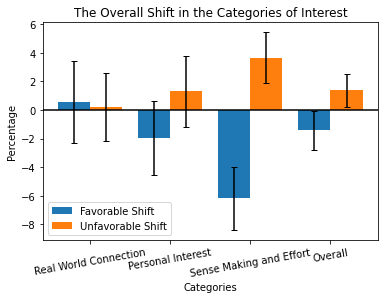

In [46]:
Categories = ["Real World Connection","Personal Interest", "Sense Making and Effort","Overall"]
Favorables = []
FavorablesError = []
Unfavorables = []
UnfavorablesError = []
for m in Categories:
    Favorables.append(f[m]['Favorable'])
    FavorablesError.append(f[m]['Favorable Error'])
    Unfavorables.append(f[m]['Unfavorable'])
    UnfavorablesError.append(f[m]['Unfavorable Error'])

X_axis = np.arange(len(Categories))
  
plt.bar(X_axis - 0.2, Favorables, 0.4, label = 'Favorable Shift', yerr = FavorablesError, ecolor = 'black', capsize = 3)
plt.bar(X_axis + 0.2, Unfavorables, 0.4, label = 'Unfavorable Shift', yerr = UnfavorablesError, ecolor = 'black', capsize = 3)
plt.axhline(0, color='black')

plt.xticks(X_axis, Categories, rotation = 10, horizontalalignment = 'center')

plt.xlabel("Categories")
plt.ylabel("Percentage")
plt.title("The Overall Shift in the Categories of Interest")
plt.legend()
plt.savefig('Plots From Data/Shift in Responses by Category/Shift in Categories of Interest',dpi = 600, bbox_inches = 'tight', pad_inches = 0.2)
plt.show()

For Shift by Major in any category of interest.

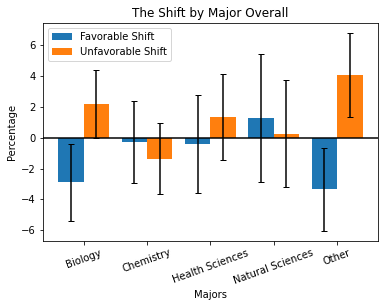

In [47]:
Favorables = []
FavorablesError = []
Unfavorables = []
UnfavorablesError = []
majs = []
for m in Majors:
    if m != "BioChemistry":
        majs.append(m)
        Favorables.append(dicsdict['Percent_By_Category_For_Major'][m]["Overall"]['Favorable'])
        FavorablesError.append(dicsdict['Percent_By_Category_For_Major'][m]["Overall"]['Favorable Error'])
        Unfavorables.append(dicsdict['Percent_By_Category_For_Major'][m]["Overall"]['Unfavorable'])
        UnfavorablesError.append(dicsdict['Percent_By_Category_For_Major'][m]["Overall"]['Unfavorable Error'])
  
X_axis = np.arange(len(majs))
  
plt.bar(X_axis - 0.2, Favorables, 0.4, label = 'Favorable Shift', yerr = FavorablesError, ecolor = 'black', capsize = 3)
plt.bar(X_axis + 0.2, Unfavorables, 0.4, label = 'Unfavorable Shift', yerr = UnfavorablesError, ecolor = 'black', capsize = 3)
plt.axhline(0, color='black')

plt.xticks(X_axis, majs, rotation = 20, horizontalalignment = 'center')

plt.xlabel("Majors")
plt.ylabel("Percentage")
plt.title("The Shift by Major Overall")
plt.legend()
plt.savefig('Plots From Data/Shift in Responses by Major/Shift by major Overall',dpi = 600, bbox_inches = 'tight', pad_inches = 0.2)
plt.show()